In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_grype import create_df

In [2]:
df= create_df()
print(df)

Empty DataFrame
Columns: [VulnerabilityID, Namespace, Status, Severity, Container]
Index: []


<Axes: >

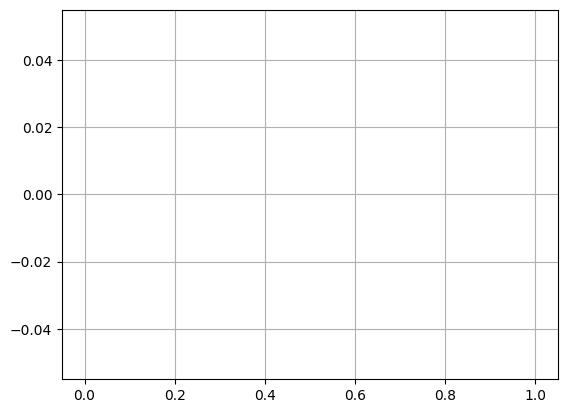

In [3]:
df['Status'].hist()

<Axes: >

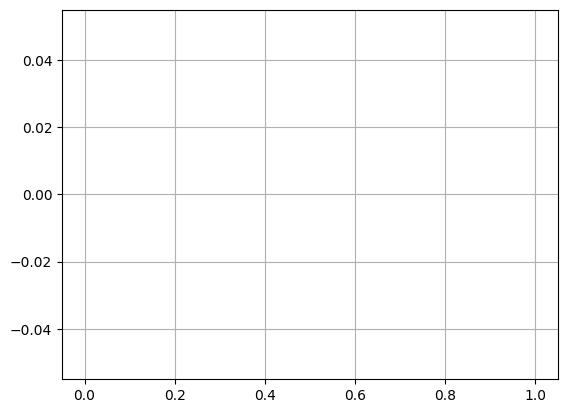

In [4]:
df['Severity'].hist()

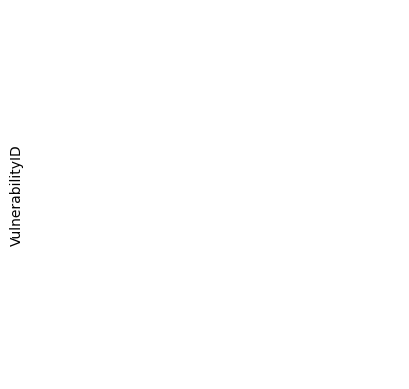

In [5]:
import numpy as np
import random
df_plot = df.groupby(['Namespace']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

In [6]:
containers = df['Container'].unique()

In [7]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()